# Peak detection with Mint.

You can use Mint to detect peaks automatically. First, you have to instantiate `mint = Mint()` and then assign some ms files with `mint.files = [list of filenames]`. Then you can run `.detect_peaks()`. All, currently loaded files with be used to create a rudimentary peaklist. When the run is successfull the generated peaklist is available via the `.peaklist` property. This feature is very basic and is under active development.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from TB.c import *

import pandas as pd
import numpy as np
import os, re

from datetime import date
from os.path import isdir, isfile, basename, dirname, join
from time import sleep
from glob import glob
from pathlib import Path as P
from tqdm.notebook import tqdm

import seaborn as sns

from matplotlib import pyplot as plt

plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 150

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 100


def today():
    return date.today().strftime('%y%m%d')



#### Example

In [3]:
from ms_mint.notebook import Mint

In [12]:
PATH = '/data/metabolomics_storage/MINT/MINT_demofiles/'
files = glob(f'{PATH}/**/*.mzXML', recursive=True)

In [13]:
len(files)

12

#### Instantiate mint and assign files

In [14]:
mint = Mint()
mint.show()

In [15]:
mint.ms_files = files
mint.list_files()

#### Run the peak detection

In [16]:
%%time
mint.detect_peaks(min_quality=1e-2)

CPU times: user 37.9 s, sys: 426 ms, total: 38.3 s
Wall time: 24.4 s


#### A peak list will be generated

In [17]:
mint.peaklist

,peak_label,mz_mean,mz_width,rt,rt_min,rt_max,intensity_threshold,peaklist_name
0,0_mz: 57.975_rt:4.3,57.975389,10,4.338975,4.178697,4.517265,0,OMS
1,1_mz: 61.988_rt:4.8,61.988116,10,4.830475,4.567823,5.061977,0,OMS
2,2_mz: 73.030_rt:2.0,73.029552,10,2.045731,1.751525,2.336558,0,OMS
3,3_mz: 82.954_rt:0.7,82.953983,10,0.741317,0.612395,0.870239,0,OMS
4,4_mz: 82.954_rt:4.8,82.953998,10,4.793792,4.671236,4.905168,0,OMS
...,...,...,...,...,...,...,...,...
303,303_mz:374.906_rt:6.5,374.905843,10,6.501158,6.182487,6.822553,0,OMS
304,304_mz:384.936_rt:6.5,384.935587,10,6.515033,6.186772,6.869141,0,OMS
305,305_mz:387.114_rt:7.4,387.113801,10,7.371267,7.291444,7.448856,0,OMS
306,306_mz:387.114_rt:7.6,387.113806,10,7.635371,7.553819,7.715843,0,OMS


#### Finally, you can run MINT to extract the data

In [18]:
%%time
mint.run()

CPU times: user 80.2 ms, sys: 176 ms, total: 256 ms
Wall time: 13.3 s


# Results

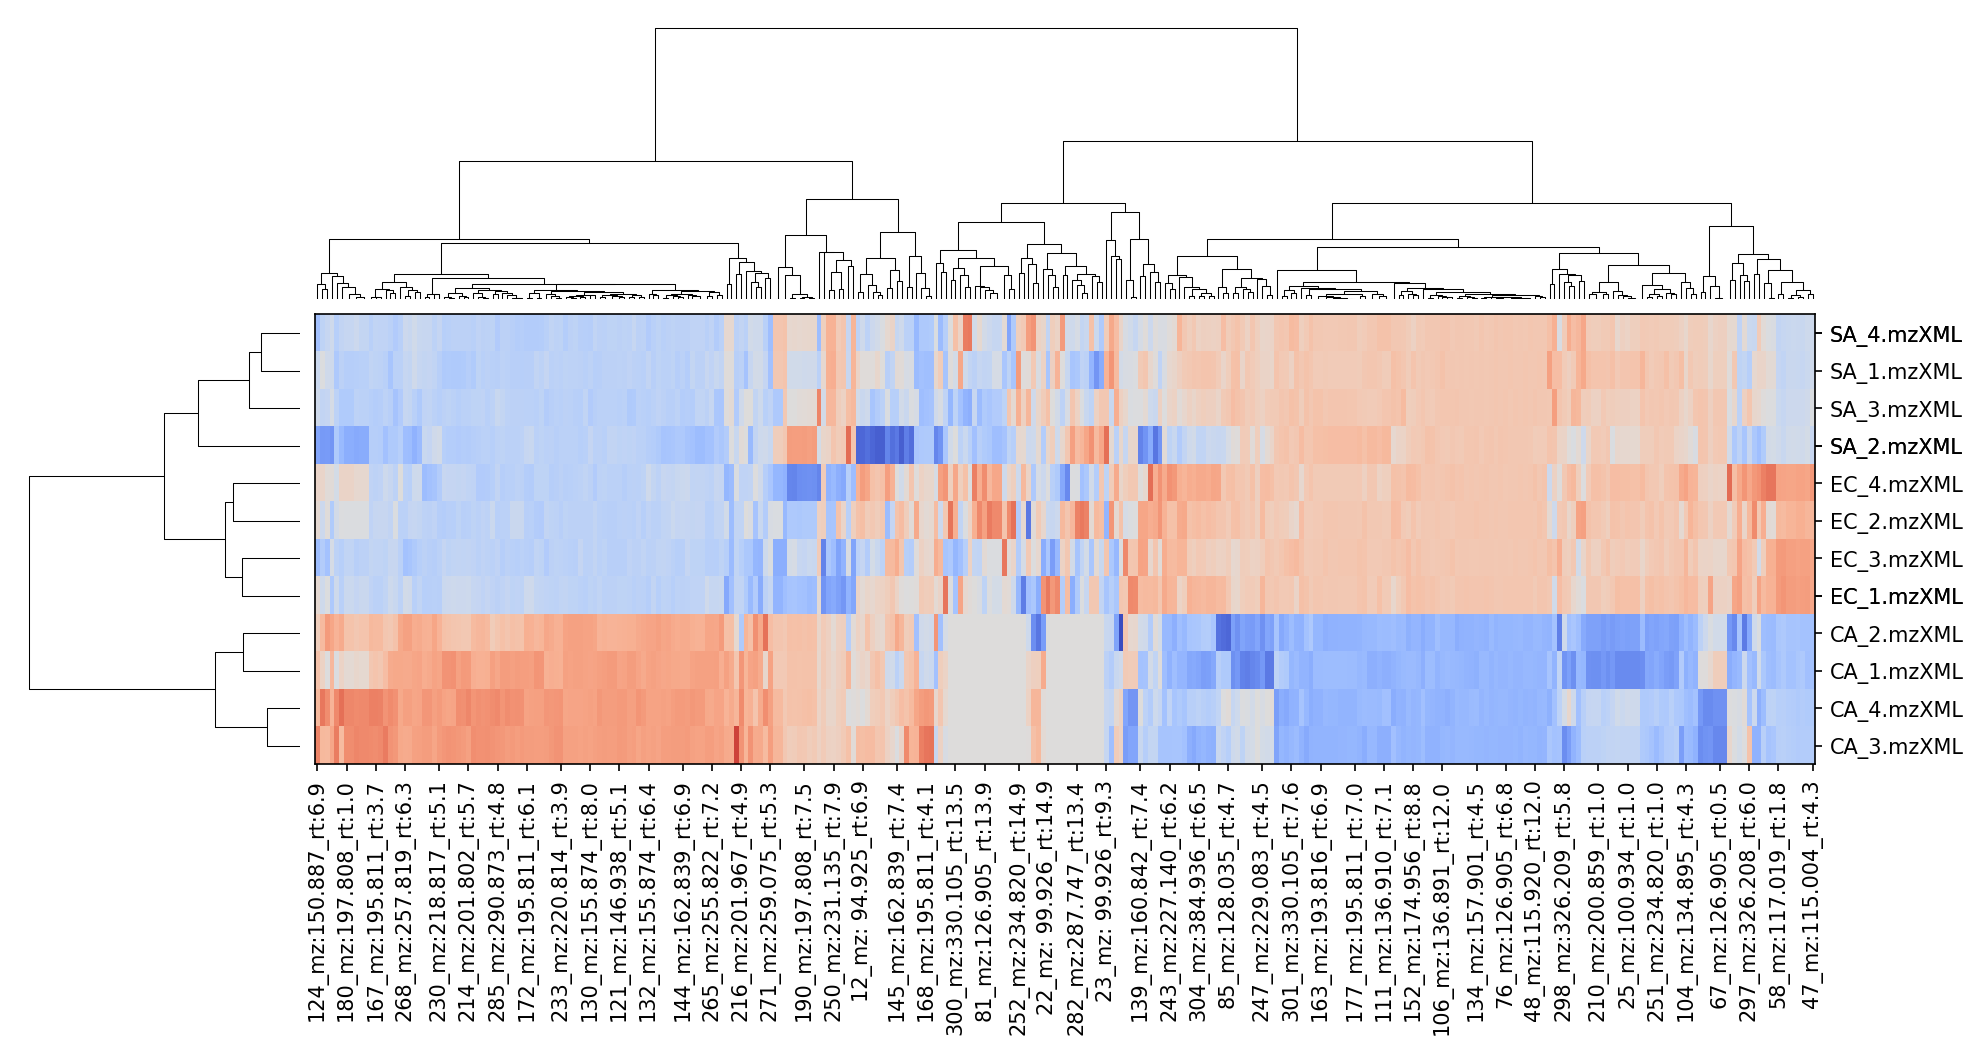

In [22]:
mint.plot_clustering(figsize=(12,5))